In [ ]:
# 1.Cài đặt thư viện

%pip install imageio
%pip install scipy
%pip install scikit-image

# 2. Viết chương trình xử lý ảnh cơ bản

## 2.1 Nạp ảnh xử dụng lệnh thu viện imageio

In [1]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

## 2.2 Nạp ảnh sửu dụng thư viện imageio 

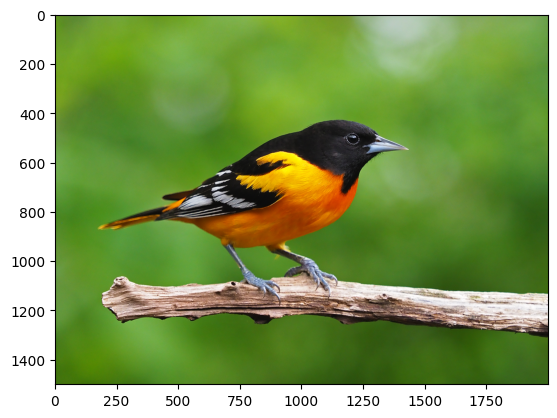

(1500, 2000, 3)

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()
data.shape 

## 2.3 độ phân giải ảnh 

### viết chương trình nạp ảnh màu và chuyển ảnh grayscale

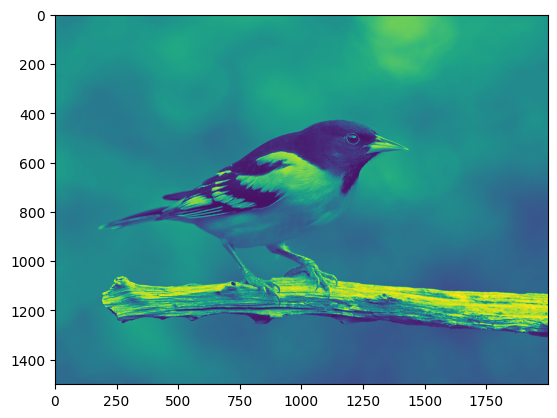

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode= 'L')
plt.imshow(data)
plt.show()

### viết chương trình nạo ảnh grayscale và giảm 4 bit thấp giữ 4 bit cao. lưu ảnh là birdf0.png

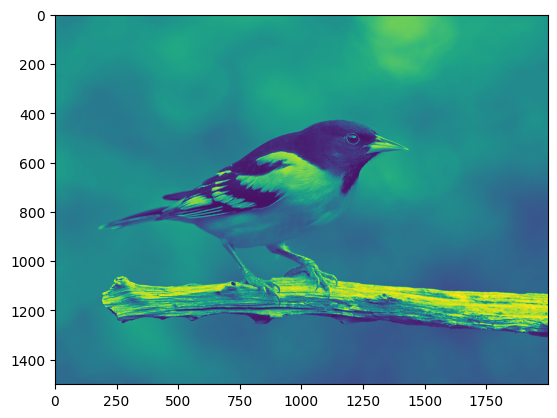

In [9]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode= 'L').astype(np.uint8)
c1= data & 0xF0
iio.imsave('birdf0.png', c1)
tmp = iio.imread('birdf0.png')
plt.imshow(data)
plt.show()

### viết chương trình tạo ảnh mới birdc0.png và bird80.png với mức giảm intensity resolution là 0xc0 và 0x80 

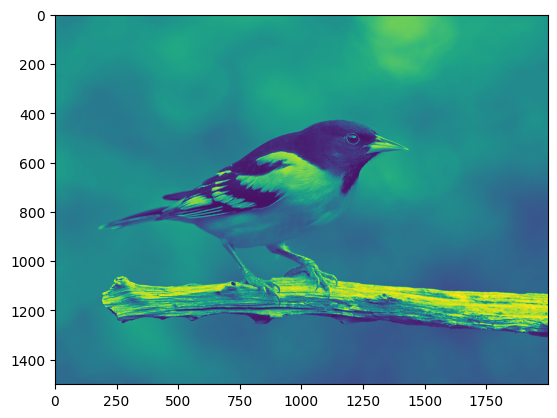

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode= 'L').astype(np.uint8)
c1= data & 0xc0
iio.imsave('birdc0.png', c1)
tmp = iio.imread('birdc0.png')
plt.imshow(data)
plt.show()

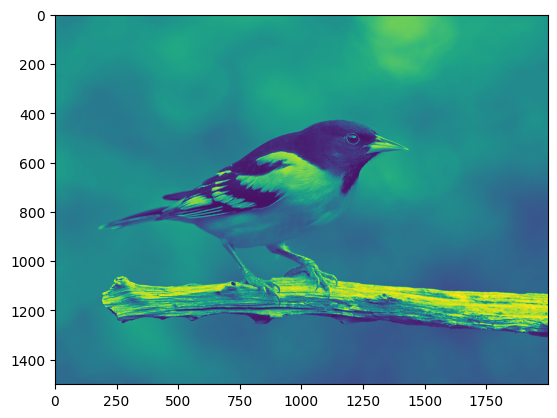

In [11]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode= 'L').astype(np.uint8)
c1= data & 0x80
iio.imsave('bird80.png', c1)
tmp = iio.imread('bird80.png')
plt.imshow(data)
plt.show()

## 2.4 màu sắc với hệ RGB

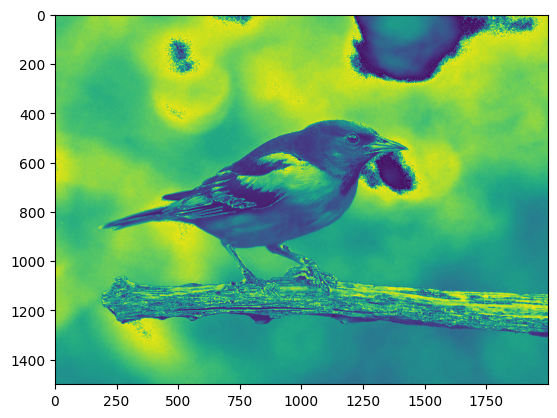

In [12]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

## 2.5 mau sắc với hệ HSV

In [13]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255,0,0)
print(a)
b=colorsys.rgb_to_hsv(1,0,0)
print (b)
c=colorsys.rgb_to_hsv(0,255,0)
print (c)
d=colorsys.hsv_to_rgb(1,1,255)
print (d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


## 2.6 ứng đụng chuyên sâu đổi hệ màu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


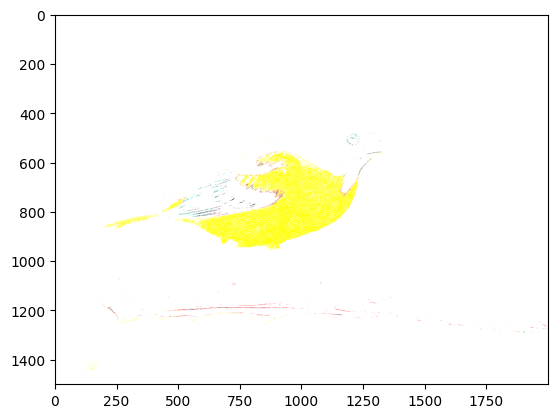

In [14]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize (colorsys.rgb_to_hsv)
h, s, v= rgb2hsv (rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h*= h
hsv2rgb = np.vectorize (colorsys.hsv_to_rgb)
rgb2 = hsv2rgb (h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show ()

## 2.7 lọc ảnh

### lọc ảnh với mean filter

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


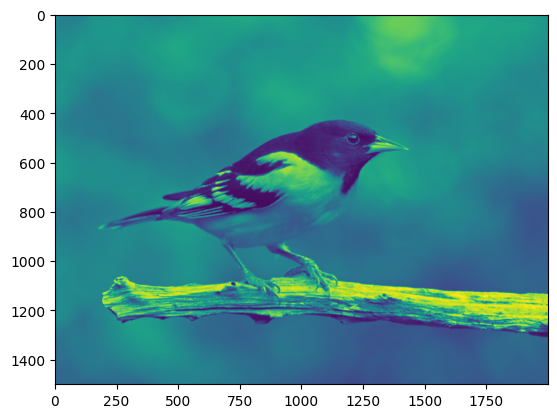

In [37]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

#đọc ảnh và chuyển sang ảnh xám
a = iio.imread('bird.png', mode ='L')

#Khởi tạo bộ lọc trung bình 5x5  mỗi phần tử có giá trị 1/25.
k= np.ones((5,5))/25
# thực hiện phép tính và lưu ảnh mới
b = sn.convolve (a, k).astype(np.uint8)
iio.imsave('bird mean filter.png', b)
print (b)
plt.imshow(b)
plt.show ()

### lọc ảnh với median filter

[[119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  81  81  81]
 [ 89  88  89 ...  81  81  81]]


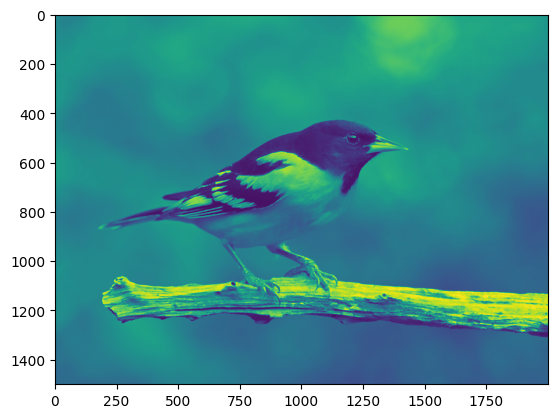

In [38]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
# đọc ảnh và chuyển sang ảnh xám
a = iio.imread('bird.png', mode='L').astype(np.uint8)
# Áp dụng median filter với kích thước kernel 5x5
## Tạo footprint là ma trận boolean 5x5

b = sn.median_filter (a, size=5, footprint=None, output=None,
mode='reflect', cval=0.0, origin=0)
iio.imsave('bird median filter.png', b)
# Áp dụng median filter với footprint
print (b)
plt.imshow(b)
plt.show ()

### lọc ảnh với max filter

[[122 122 122 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 ...
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]]


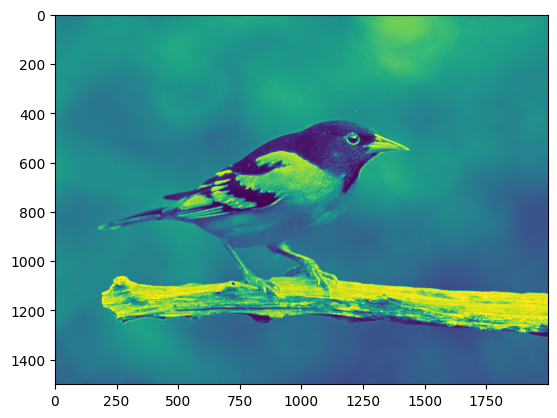

In [39]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L').astype (np.uint8)
# performing maximum filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
##The pixels in the input image corresponding to the points to the
##footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.maximum_filter (a, size=5, footprint= None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird max filter.png', b)
# b is converted from an ndarray to an image
print (b)
plt.imshow (b)
plt.show ()

### lọc ảnh với min filter

[[118 118 117 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 ...
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  78  78  78]]


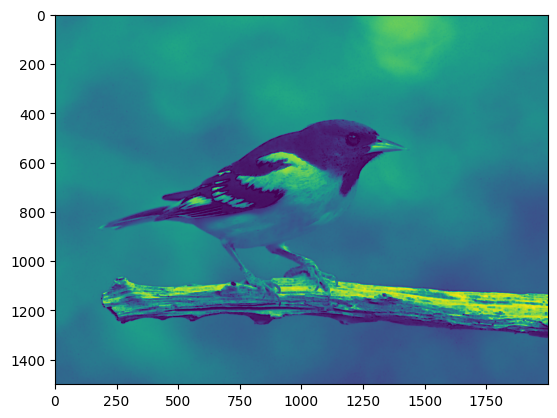

In [40]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L').astype (np.uint8)
# performing minimum filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
##The pixels in the input image corresponding to the points to the
##footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.minimum_filter (a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird min filter.png', b)
#b is converted from an ndarray to an image
print (b)
plt.imshow (b)
plt.show ()

# 3 BÀI TẬP

## BÀI 1: Nạp ảnh 3 màu khác nhau

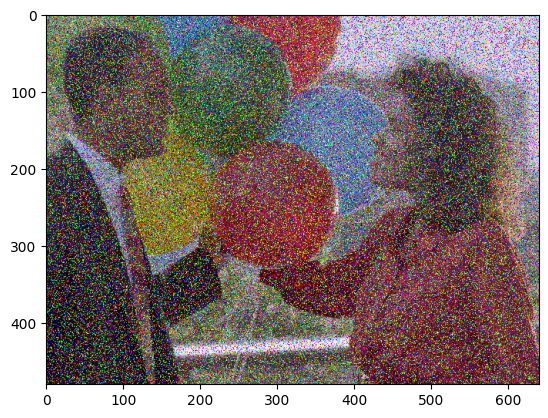

(480, 640, 3)

In [28]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/balloons_noisy.png')
plt.imshow(data)
plt.show()
data.shape 

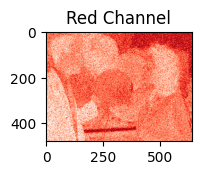

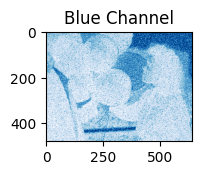

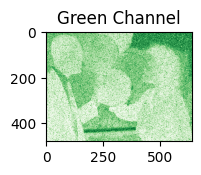

In [31]:
data = iio.imread('exercise/balloons_noisy.png')
plt.subplot(1,3,1)
plt.title('Red Channel')
plt.imshow(data[:,:,0], cmap='Reds')
plt.show()

plt.subplot(1,3,2)
plt.title('Blue Channel')
plt.imshow(data[:,:,2], cmap='Blues')
plt.show()

plt.subplot(1,3,3)
plt.title('Green Channel')
plt.imshow(data[:,:,1], cmap='Greens')
plt.show()



## Bài 2

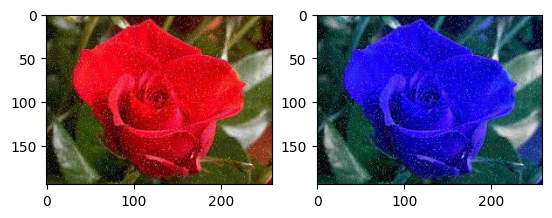

In [36]:
data = iio.imread('exercise/flower.jpeg')
swapped = data[:,:,[2,1,0]]
data2= iio.imwrite('exercise/flower_hoan.jpeg',swapped)

plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(swapped)
plt.show()


## Bài 3

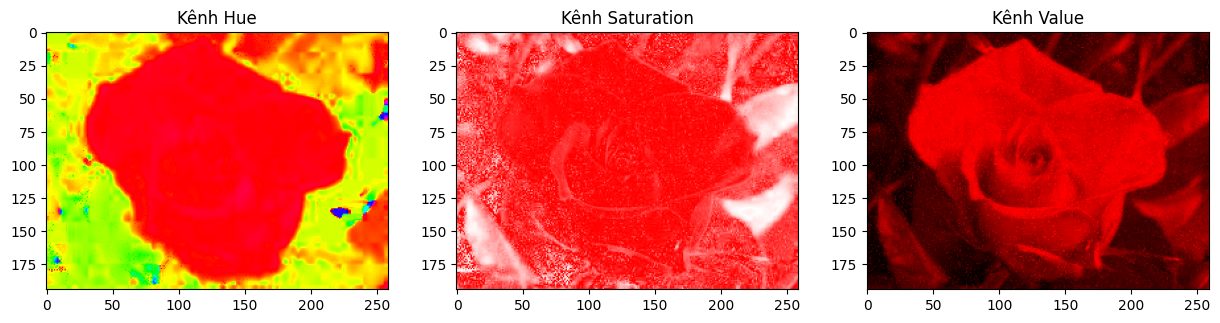

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# Nạp ảnh bằng imageio
img = iio.imread('exercise/flower.jpeg')  # Ảnh sẽ có định dạng RGB sẵn

# Chuyển RGB sang HSV
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(img[:, :, 0]/255, img[:, :, 1]/255, img[:, :, 2]/255)

# Tạo 3 ảnh tương ứng với từng kênh H, S, V

# Ảnh chỉ giữ Hue
h_img = np.vectorize(colorsys.hsv_to_rgb)(h, np.ones_like(s), np.ones_like(v))
h_img = (np.array(h_img).transpose((1, 2, 0)) * 255).astype(np.uint8)

# Ảnh chỉ giữ Saturation
s_img = np.vectorize(colorsys.hsv_to_rgb)(np.zeros_like(h), s, np.ones_like(v))
s_img = (np.array(s_img).transpose((1, 2, 0)) * 255).astype(np.uint8)

# Ảnh chỉ giữ Value
v_img = np.vectorize(colorsys.hsv_to_rgb)(np.zeros_like(h), np.ones_like(s), v)
v_img = (np.array(v_img).transpose((1, 2, 0)) * 255).astype(np.uint8)

# Hiển thị ảnh
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h_img)
plt.title("Kênh Hue")

plt.subplot(1, 3, 2)
plt.imshow(s_img)
plt.title("Kênh Saturation")

plt.subplot(1, 3, 3)
plt.imshow(v_img)
plt.title("Kênh Value")

plt.show()

# Lưu ảnh nếu cần
iio.imwrite('exercise/hue_image.png', h_img)
iio.imwrite('exercise/saturation_image.png', s_img)
iio.imwrite('exercise/value_image.png', v_img)

## bài 4


In [2]:
h=h/3
v=v*0.75
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r,g,b= hsv2rgb(h,s,v)
rgb_new= np.dstack((r,g,b))*255
iio.imwrite('exercise/hsv_modified.jpeg', rgb_new.astype(np.uint8))
